<a href="https://colab.research.google.com/github/clarissa-souza/SQL_Server-GCP-DBeaver/blob/main/GCP_SQL_Server_DBeaver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sobre o problema proposto:

1 - Com base no texto enviado para permitir que uma Pessoa possa cursar dois cursos ao mesmo tempo foi necessário
entender a tabela Aluno como uma tabela de relacionamento. A pessoa pode, por exemplo, fazer uma Pós e um MBA
ou fazer uma segunda graduação e um MBA ao mesmo tempo. Dessa forma, a Entidade é a Pessoa e o Aluno é uma tabela
de relacionamento onde uma pessoa pode ter um relacionamento com vários alunos;

2 - Um curso tem apenas um currículo (Acadêmico, Humanístico ou Tecnológico);

3 - Um Aluno ativo é um aluno que esteja matriculado em pelo menos uma disciplina.

A partir desse entendimento a modelagem ficou da seguinte forma:

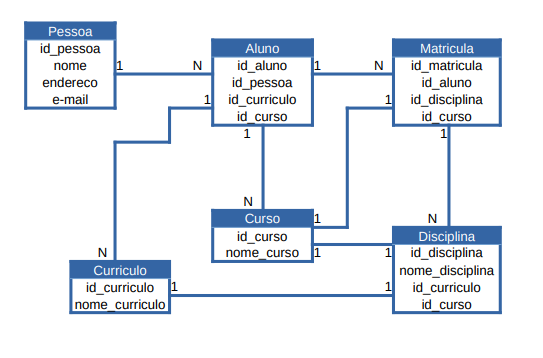

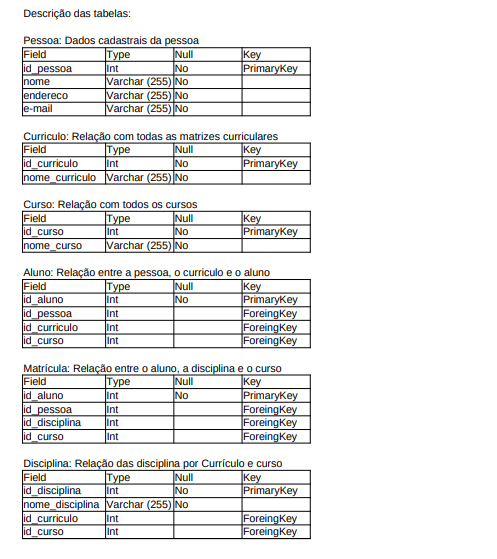

Para desenvolver o projeto utilizei a plataforma GC. Em SQL primeiro você precisa criar sua instância. Quando estiver riandoa instância permita o IP Público. Depois de criar a instância, ainda no GCP, você precisa criar o banco de dados onde você vai trabalhar. 

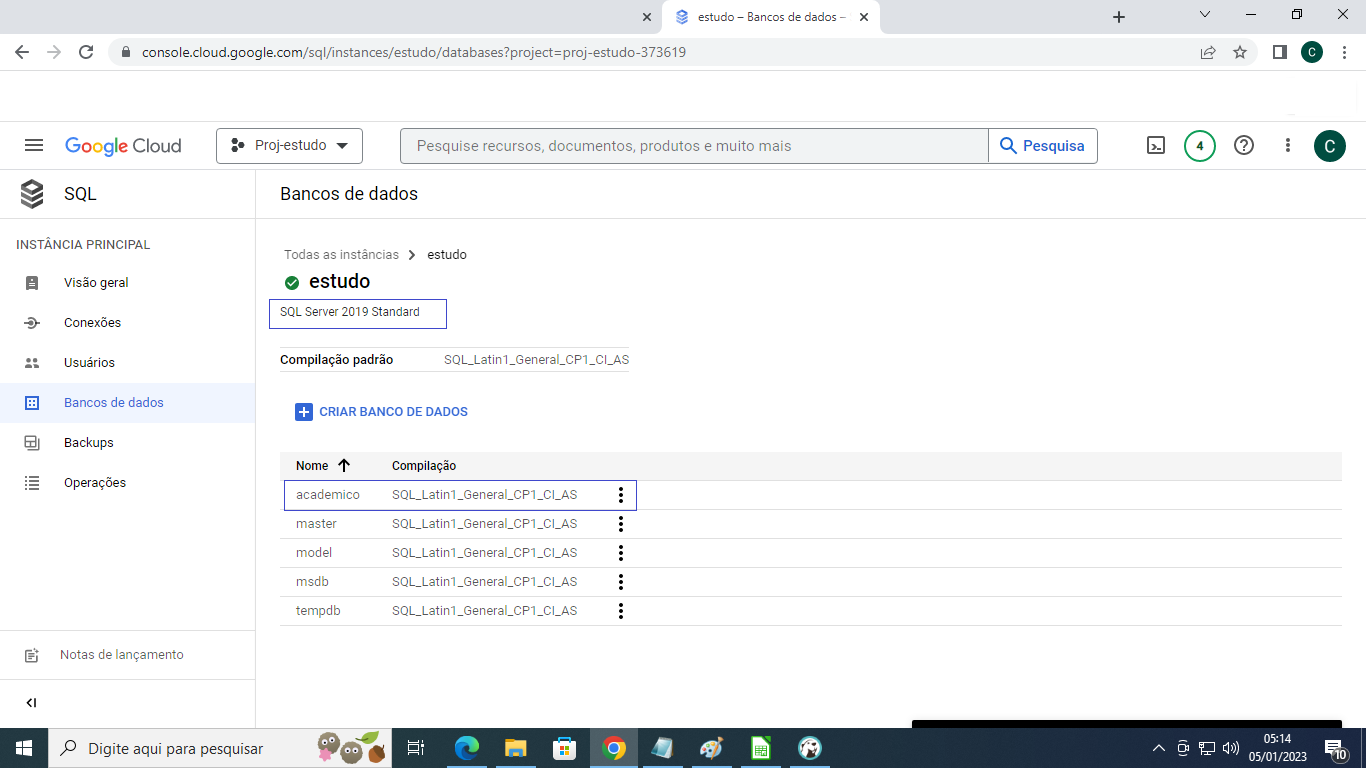

Não esqueça de adicionar o endereço da sua rede local em Conexões > Rede

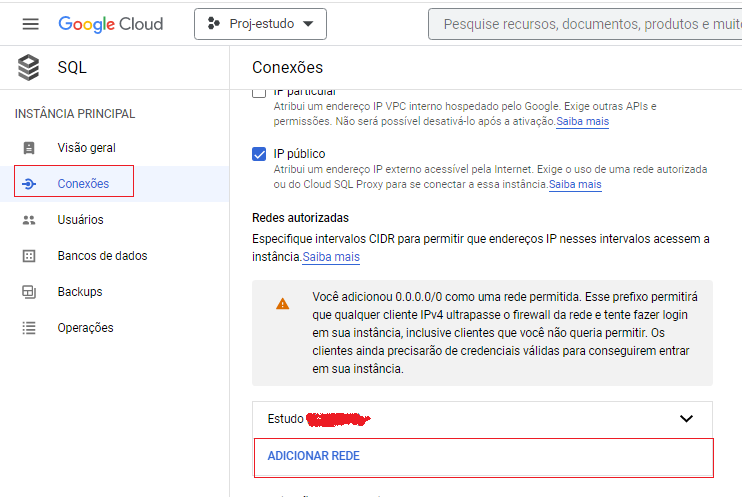

Você precisa desse IP Público para configurar no DBeaver

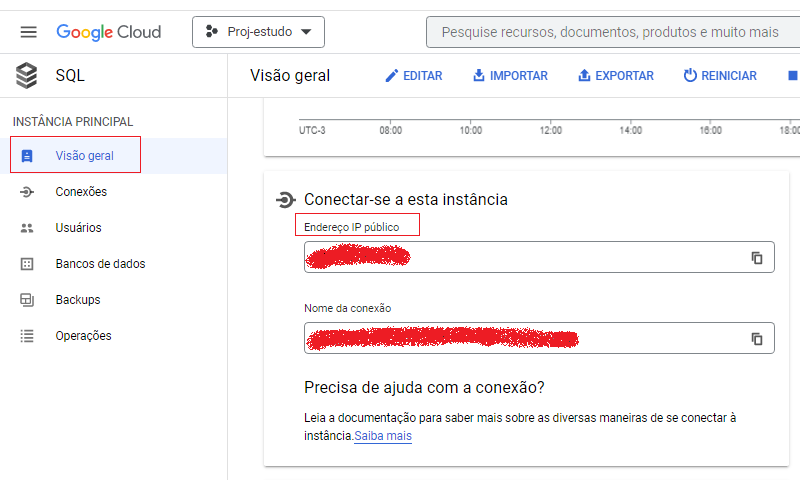

No Dbeaver crie uma nova conexão SQL informando o seu IP Público na conexão
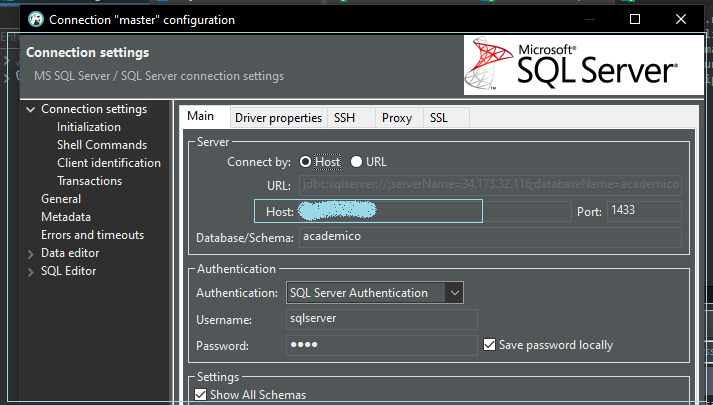

Agora estamos prontos para inserir as tabelas, popular e gerar os relatórios.Os comando abaixo devem ser executados no Dbeaver no Console do SQL

In [ ]:
# Criando as tabelas

CREATE TABLE pessoa (
    id_pessoa int IDENTITY(1,1) PRIMARY KEY,
    nome varchar (255) NOT NULL,
    endereco varchar (255) NOT NULL,
    email varchar (255) NOT NULL
);

CREATE TABLE aluno (
    id_aluno int IDENTITY(1,1) PRIMARY KEY,
    id_pessoa int,
    id_curriculo int,
    id_curso int
);

CREATE TABLE curriculo (
    id_curriculo int IDENTITY(1,1) PRIMARY KEY,
    nome_curriculo varchar (255) NOT NULL
);

CREATE TABLE curso (
    id_curso int IDENTITY(1,1) PRIMARY KEY,
    nome_curso varchar (255) NOT NULL
);

CREATE TABLE disciplina (
    id_disciplina int IDENTITY(1,1) PRIMARY KEY,
    id_curriculo int,
    id_curso int,
    nome_disciplina varchar (255) NOT NULL
);

CREATE TABLE matricula (
    id_matricula int IDENTITY(1,1) PRIMARY KEY,
    id_disciplina int,
    id_curso int,
    id_aluno int
);

# Atribuindo as foreing key 

ALTER TABLE aluno 
ADD FOREIGN KEY (id_curriculo) REFERENCES curriculo(id_curriculo);

ALTER TABLE aluno  
ADD FOREIGN KEY (id_curso) REFERENCES curso(id_curso);

ALTER TABLE aluno  
ADD FOREIGN KEY (id_pessoa) REFERENCES pessoa(id_pessoa);

ALTER TABLE disciplina  
ADD FOREIGN KEY (id_curriculo) REFERENCES curriculo(id_curriculo);

ALTER TABLE disciplina  
ADD FOREIGN KEY (id_curso) REFERENCES curso(id_curso);

ALTER TABLE matricula  
ADD FOREIGN KEY (id_aluno) REFERENCES aluno(id_aluno);

ALTER TABLE matricula  
ADD FOREIGN KEY (id_curso) REFERENCES curso(id_curso);

ALTER TABLE matricula  
ADD FOREIGN KEY (id_disciplina) REFERENCES disciplina(id_disciplina);


In [ ]:


# Populando o banco

INSERT INTO curso (nome_curso)
VALUES ('Graduacao em Direito'),('Pos-Graduacao em Direito'),('MBA em Gestao');

INSERT INTO curriculo (nome_curriculo)
VALUES ('Curriculo Academico'),('Curriculo Humanistico'),('Curriculo Tecnologico');

INSERT INTO disciplina (id_curriculo, id_curso, nome_disciplina)
VALUES (1,1,'Introducao ao Estudo do Direito'),(1,1,'Introducao a Filosofia'),(1,1,'Ciencia Politica'),
(1,1,'Teorias do Estado'),(1,1,'Psicologia'),(1,1,'Antropologia');

INSERT INTO disciplina (id_curriculo, id_curso, nome_disciplina)
VALUES (2,2,'Seminario de Pesquisa e Integracao'),(2,2,'Direitos Humanos e Direitos Fundamentais'),(2,2,'Fundamentos das Garantias Penais');

INSERT INTO disciplina (id_curriculo, id_curso, nome_disciplina)
VALUES (3,3,'Estrategia Empresarial e Sustentabilidade'),(3,3,'Fundamentos da Administracao Financeira'),(3,3,'Economia Empresarial');

INSERT INTO pessoa (nome,endereco,email) 
VALUES ('Jane Austin','Rua A','janeaustin@email.com'),
('Fernando Pessoa','Rua B','fernandopessoa@email.com'),
('Clarisse Lispector','Rua C','clarisselispector@email.com'),
('Jose Lins do Rego','Rua D','joselins@email.com'),
('Machado de Assis','Rua E','machadoassis@email.com'),
('Agatha Christie','Rua F','agathachristie@email.com'),
('Cecilia Meireles','Rua G','ceciliameireles@email.com'),
('Cora Coralina','Rua H','coracoralina@email.com'),
('Stephen King','Rua I','stephenking@email.com'),
('Ada Lovelace','Rua J','adalovelace@email.com'),
('Conceicao Evaristo','Rua K','conceicaoevaristo@email.com'),
('Lima Barreto','Rua L','limabarreto@email.com'),
('Hilda Hilst','Rua M','hildahilst@email.com'),
('George Well','Rua N','georgewell@email.com'),
('Virginia Woolf','Rua O','virginiawoolf@email.com'),
('Lygia Fagundes Teles','Rua P','lygiateles@email.com');

INSERT INTO aluno (id_pessoa, id_curriculo, id_curso)
VALUES (1,1,1),(2,1,1),(3,1,1),(4,2,2),(5,2,2),(6,3,3),(7,3,3),(8,1,1),
(9,2,2),(10,3,3)(11,NULL,NULL),(12,NULL,NULL),(13,NULL,NULL),
(14,3,3),(14,2,2),(15,3,3),(15,1,1),(16,2,2),(16,3,3);

INSERT INTO matricula (id_disciplina,id_curso,id_aluno) 
VALUES (1,1,1),(3,1,1),(5,1,1),(2,1,2),(4,1,2),(5,1,2),(3,1,3),
(2,1,3),(1,1,3),(5,1,3),(8,2,4),(6,2,5),(9,3,6),(10,3,7),(11,3,7),
(4,1,8),(6,2,9),(7,2,9),(8,2,9),(11,3,10),(9,3,10),(10,3,10),
(11,3,14),(12,3,14),(7,2,15),(8,2,15),
(10,3,16),(12,3,16),(4,1,17),(5,1,17),
(7,2,18),(8,2,18),(10,3,19),(11,3,19);



In [ ]:

# Selects para os relatórios

select curso.nome_curso as 'Curso', pessoa.nome as 'Aluno' 
from pessoa, aluno, curso 
where curso.id_curso=aluno.id_curso and aluno.id_pessoa=pessoa.id_pessoa
order by pessoa.nome

select DISTINCT curso.nome_curso as 'Curso', pessoa.nome as 'Nome Aluno' 
from pessoa, aluno, curso, matricula  
where matricula.id_curso=curso.id_curso and matricula.id_aluno=aluno.id_aluno AND  aluno.id_pessoa=pessoa.id_pessoa
order by curso.nome_curso

select DISTINCT disciplina.nome_disciplina as 'Disciplinas com Matriculas'
from disciplina, matricula  
where matricula.id_disciplina=disciplina.id_disciplina
order by disciplina.nome_disciplina

select curso.nome_curso as 'Curso', curriculo.nome_curriculo as 'Curriculo', pessoa.nome as 'Aluno' 
from curso, curriculo, pessoa, aluno  
where aluno.id_pessoa=pessoa.id_pessoa and aluno.id_curso=curso.id_curso and aluno.id_curriculo=curriculo.id_curriculo
order by curso.nome_curso

select aluno.id_aluno as 'Codigo do Aluno', pessoa.nome as 'Nome do Aluno' from pessoa, aluno  
where aluno.id_pessoa=pessoa.id_pessoa and aluno.id_curso is NULL 
order by pessoa.nome

select curriculo.nome_curriculo as 'Matriz Curricular', disciplina.nome_disciplina as 'Disciplina' 
from disciplina, curriculo  
where disciplina.id_curriculo = curriculo.id_curriculo
order by curriculo.nome_curriculo, disciplina.nome_disciplina

